In [ ]:
# This notebook will be analysing a dataset of 4998 movies having various fields like 
#     Title, Cast, Budget, Gross, IMDB Rating and more.

# Movies, part of entertainment industry are where we see a blend of Commerce and Arts. Year on Year we see big production
#     houses tussling over to get the best cast, best release dates so as to make big money, and parallely we see 
#    various artist collaborating to produce some amazing content which is ctirically acclaimed and appreciated.

# We believe the purpose of making moves can broadly be classified into two parts:
#     1) Make Big money. The box office gross of a movie can be a valid metric for this aspect.
#     2) Earn Recpect. Respect can be subjective but broadly critically acclaimed movies earns respect.
#        IMDB score can be used as a proxy for this.

# In this analysis we will be focusing on how various elements of a movie impacts Gross, and IMDB score of that movie.

In [14]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [61]:
# Reading the csv file and cleaning data to prepare for further processing.

movies_data_file_name = "movie_metadata.csv"
movies = pd.read_csv(movies_data_file_name)
movies.drop_duplicates(inplace=True)
char_fields = ['color', 'director_name', 'actor_2_name','genres','actor_1_name','actor_3_name','movie_title','plot_keywords','movie_imdb_link','language','country']
for field in char_fields:
    movies[field].fillna(value="Not Available", inplace = True)
    movies[field] = movies[field].apply(str.strip)
print("Loaded total", len(movies), "movies and", len(list(movies)), "fileds.")

Loaded total 4998 movies and 28 fileds.


In [62]:
# Let's see all the fields we have to analyse
list(movies)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [63]:
#Lets Check Out the top 10 Grossing Movies
movies.sort_values(by='gross', ascending = False)[['movie_title','title_year']].head(10)

,movie_title,title_year
0,Avatar,2009.0
26,Titanic,1997.0
29,Jurassic World,2015.0
17,The Avengers,2012.0
66,The Dark Knight,2008.0
240,Star Wars: Episode I - The Phantom Menace,1999.0
3024,Star Wars: Episode IV - A New Hope,1977.0
8,Avengers: Age of Ultron,2015.0
3,The Dark Knight Rises,2012.0
582,Shrek 2,2004.0


In [64]:
# And the top rated movies
movies.sort_values(by='imdb_score', ascending = False)[['movie_title','title_year']].head(10)

,movie_title,title_year
2765,Towering Inferno,NaN
1937,The Shawshank Redemption,1994.0
3466,The Godfather,1972.0
3207,Dekalog,NaN
2824,Dekalog,NaN
4409,Kickboxer: Vengeance,2016.0
66,The Dark Knight,2008.0
3481,Fargo,NaN
2837,The Godfather: Part II,1974.0
1874,Schindler's List,1993.0


In [68]:
# Top Grossing Director
movies['director_gross'] = movies.groupby('director_name')['gross'].transform('sum')
movies['director_gross_average'] = movies.groupby('director_name')['gross'].transform('mean')
movies['director_movie_count'] = movies.groupby('director_name')['movie_title'].transform('count')


directors = movies.drop_duplicates(subset='director_name')
directors = directors[['director_name','director_movie_count', 'director_gross','director_gross_average']]
print("Top Grossing Directors: ")
print(directors.sort_values(by='director_gross', ascending = False).head(10))
print("Top Grossing (Average) Directors: ")
print(directors[directors['director_movie_count']>=3].sort_values(by="director_gross_average",ascending=False).head(10))




Top Grossing Directors: 
         director_name  director_movie_count  director_gross  \
54    Steven Spielberg                    26    4.114233e+09   
20       Peter Jackson                    12    2.592969e+09   
36         Michael Bay                    13    2.231243e+09   
33          Tim Burton                    16    2.071275e+09   
6            Sam Raimi                    13    2.049549e+09   
0        James Cameron                     7    1.948126e+09   
3    Christopher Nolan                     8    1.813228e+09   
236       George Lucas                     5    1.741418e+09   
61     Robert Zemeckis                    13    1.619309e+09   
202     Chris Columbus                    11    1.618708e+09   

     director_gross_average  
54             1.645693e+08  
20             2.160808e+08  
36             1.716340e+08  
33             1.294547e+08  
6              1.707958e+08  
0              2.783037e+08  
3              2.266534e+08  
236            3.482837e+08  


In [ ]:
# Top Grossing Actors
actors = movies[["actor"]]

In [69]:
# Gross v Rating
# Remove all NULL records and prepare a Scatter plot
df = movies.dropna(subset=['gross','imdb_score'])
fig = px.scatter(df,x='gross', y='imdb_score')
fig.show()

We see there are lot more movies packed in 0-100M bucket compared to movies with more than 500M gross.
Also we see as the gross increases imdb_score shifts towards 7 and 8, lets filter out movies above 500M gross.

In [70]:
df = movies[movies['gross']<=300000000].dropna(subset=['gross','imdb_score'])
fig = px.scatter(df,x='gross', y='imdb_score')
fig.show()

 As expected we can have similar observation: 
     "Movies with low imdb_score will fizzle out early and won't go on to gross big money".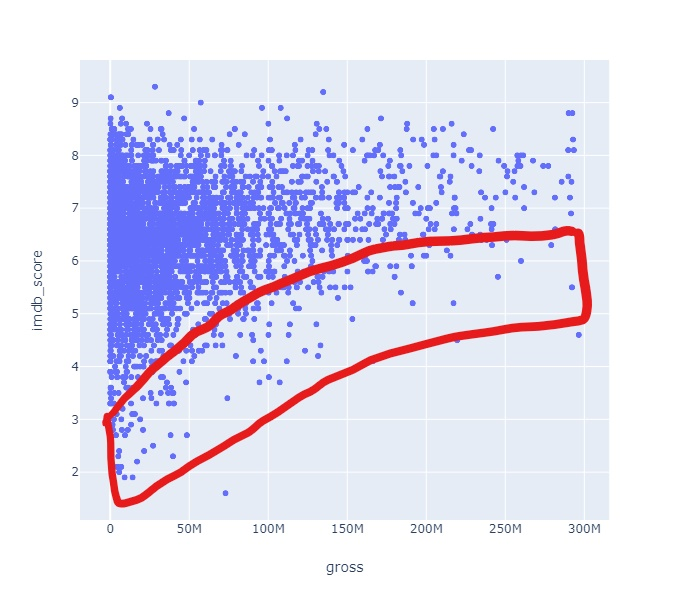

In [32]:
# # Bringing in the Budget field into analysis
# df = movies.dropna(subset=['gross','imdb_score','budget'])
# df = df[(df['gross']<=500000000) & (df['budget'] <= 200000000)]
# x= df['gross']
# y= df['imdb_score']
# z= df['budget']

# fig = px.line_3d(df, x="gross", y="budget", z="imdb_score")


# # fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, opacity=0.5, color='rgba(244,22,100,0.6)')],
# #                layout = go.Layout( title="Gross v imdb_score v Budget",  scene={"xaxis": {'title': 'Gross'},
# #                          "yaxis": {"title": 'imdb_score'},
# #                          "zaxis":{"title": "Budget"}}))
# # fig.update_xaxes(title_text='Gross')
# # fig.update_yaxes(title_text='imdb_score')
# # fig.update_zaxes(title_text='Budget')

# fig.show()

In [71]:
# Lets get budget of the movie into analysis
print("Range of Budget: \nMax:",movies['budget'].max(),"\nMin:",movies['budget'].min())
print("Removing the top 12% and bottom 12% of outliers.")
q=movies['budget'].quantile([.12,.88])
df=movies[(movies['budget']>=q[.12]) & (movies['budget']<=q[.88])]
print("Range of Budget(outliers Removed): \nMax:",df['budget'].max(),"\nMin:",df['budget'].min())
print("Removing the top 12% and bottom 12% of outliers.")

Range of Budget: 
Max: 12215500000.0 
Min: 218.0
Removing the top 12% and bottom 12% of outliers.
Range of Budget(outliers Removed): 
Max: 75000000.0 
Min: 1950000.0
Removing the top 12% and bottom 12% of outliers.


In [8]:
# Let concentrate now on the Gross. 
# 